In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_subgroup_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import ShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_NORMAL_500_v2.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,2.660293,3.056744,-54.787036,147.531109,-127.049232,92.973527,-106.050250,86.720460,-28.215510,105.774728,...,-78.753511,10.121191,-79.401384,137.907317,33.417117,NaN,NaN,NaN,0.618168,0.0
1,43.003942,-137.208256,80.354776,-13.665030,95.036263,68.104365,135.226084,-17.488579,-83.678686,208.638704,...,-168.042861,-36.327714,-39.011280,-31.864061,103.265420,NaN,NaN,NaN,0.518792,0.0
2,9.471141,63.497215,-31.482380,-103.339378,202.875207,-8.517136,-61.251503,113.188059,110.701716,48.484166,...,72.351982,-6.083924,47.765295,-120.517771,133.320785,NaN,NaN,NaN,0.377066,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.695814
std        0.213933
min        0.162652
25%        0.489618
50%        0.760636
75%        0.894511
max        0.999123
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

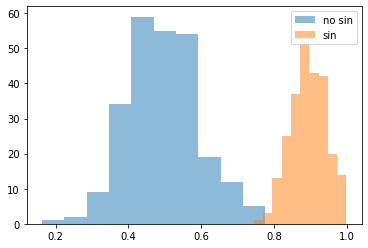

In [8]:
# Plot error distributions
plt.hist(df.loc[df['label']==0, 'error'], alpha=0.5, label='no sin')
plt.hist(df.loc[df['label']==1, 'error'], alpha=0.5, label='sin')
plt.legend(loc='upper right')

In [9]:
X = df.drop(columns=['error', 'label', 'sin_x0', 'sin_x1', 'sin_y']) #
y = df['error']

In [10]:
sss = ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [11]:
from gendis.genetic import GeneticExtractor
from gendis.subgroup_distance import SubgroupDistance

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
DIST_THRESHOLD = 150

fitness_func = SubgroupDistance(
    distance_function=SubgroupDistance.wasserstein_distance, 
    shapelet_dist_threshold=DIST_THRESHOLD,
    min_support=10,
    standardize=False
)

args = {
    "dist_function": "dtw",
    "apply_differencing": True,
    "fitness": fitness_func,
    "population_size": 200, 
    "iterations": 100,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3,
    "max_shaps": 5,
    "wait": 20, 
    "min_len": 30,
    "max_len": 60,
    "n_jobs": multiprocessing.cpu_count() - 3,
    "verbose": True,
    "dist_threshold": DIST_THRESHOLD,
} 

gendis = GeneticExtractor(**args)

In [13]:
gendis.__dict__

{'dist_function': <function gendis.shapelets_distances.dtw(timeseries_matrix, shaps, distances)>,
 'dist_func_returns': True,
 'fitness': <gendis.subgroup_distance.SubgroupDistance at 0x7758cf3d8358>,
 'apply_differencing': True,
 'population_size': 200,
 'iterations': 100,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 30,
 'max_len': 60,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapel

In [14]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-97499.9977		0.143949	4.7051
2		-85999.9881		0.182925	4.4462
3		-76999.9761		0.368298	3.741
4		-40999.9172		0.380874	3.4555
5		-28999.87		0.380874	2.6882
6		-15999.8224		0.390881	2.4474
7		-9499.7815		0.390881	2.4267
8		-6999.7525		0.390881	2.3704
9		-6999.7438		0.390881	2.4191
10		-11999.7424		0.390881	2.3494
11		-5499.706		0.390881	2.3591
12		-8499.7055		0.390881	2.4558
13		-8999.7043		0.390881	1.9207
14		-5499.6825		0.390881	2.1502
15		-4999.6719		0.390881	2.2682
16		-7999.6771		0.390881	1.8322
17		-5499.6607		0.390881	1.8498
18		-5499.6539		0.390881	1.739
19		-11999.6753		0.390881	1.8694
20		-4999.6447		0.390881	1.7792
21		-4999.6448		0.390881	1.6504
22		-2999.6335		0.390881	1.79
23		-3999.6355		0.390881	1.6696
24		-4999.6389		0.390881	1.7958
25		-6499.6433		0.390881	1.9734
CPU times: user 1min 23s, sys: 3.65 s, total: 1min 26s
Wall time: 1min 54s


In [15]:
%%time
distances = gendis.transform(X_test, standardize=False, return_positions=True)

CPU times: user 242 ms, sys: 94 µs, total: 242 ms
Wall time: 238 ms


Testing separation for shapelet 0


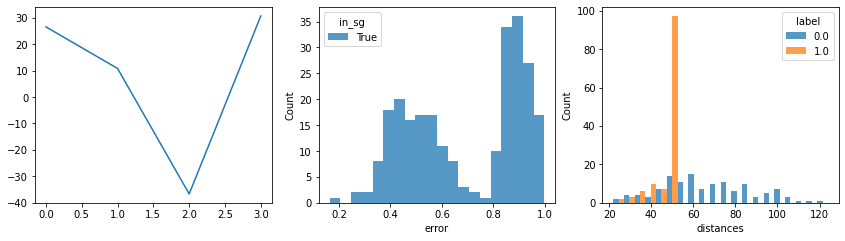

Subgroup 'accuracy': 0.5
confusion matrix, label x subgroup label
[[  0 125]
 [  0 125]]
Error stats
Samples in subgroup:
count    250.000000
mean       0.692030
std        0.218400
min        0.162652
25%        0.484666
50%        0.765448
75%        0.894424
max        0.999123
Name: error, dtype: float64

Samples not in subgroup:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: error, dtype: float64
Testing separation for shapelet 1


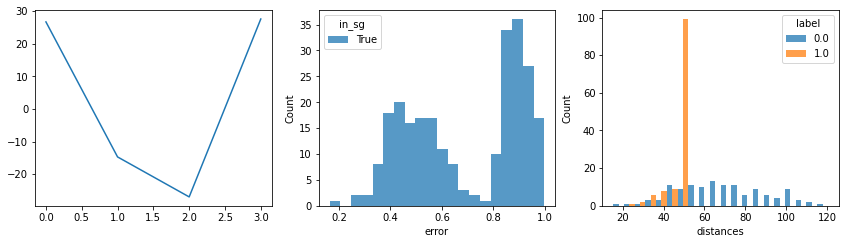

Subgroup 'accuracy': 0.5
confusion matrix, label x subgroup label
[[  0 125]
 [  0 125]]
Error stats
Samples in subgroup:
count    250.000000
mean       0.692030
std        0.218400
min        0.162652
25%        0.484666
50%        0.765448
75%        0.894424
max        0.999123
Name: error, dtype: float64

Samples not in subgroup:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: error, dtype: float64
Testing separation for shapelet 2


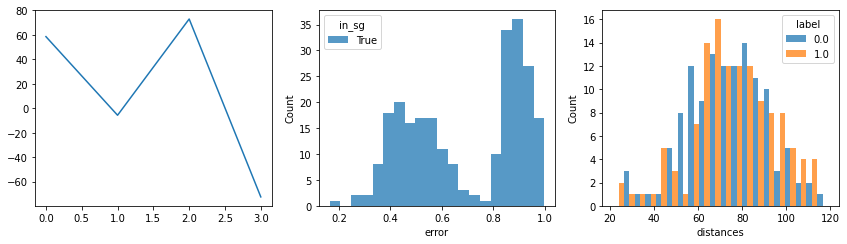

Subgroup 'accuracy': 0.5
confusion matrix, label x subgroup label
[[  0 125]
 [  0 125]]
Error stats
Samples in subgroup:
count    250.000000
mean       0.692030
std        0.218400
min        0.162652
25%        0.484666
50%        0.765448
75%        0.894424
max        0.999123
Name: error, dtype: float64

Samples not in subgroup:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: error, dtype: float64
Testing separation for shapelet 3


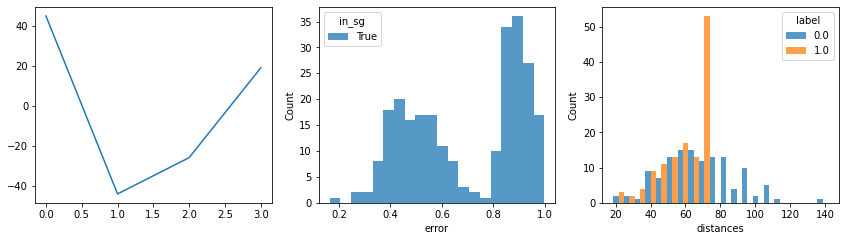

Subgroup 'accuracy': 0.5
confusion matrix, label x subgroup label
[[  0 125]
 [  0 125]]
Error stats
Samples in subgroup:
count    250.000000
mean       0.692030
std        0.218400
min        0.162652
25%        0.484666
50%        0.765448
75%        0.894424
max        0.999123
Name: error, dtype: float64

Samples not in subgroup:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: error, dtype: float64
Testing separation for shapelet 4


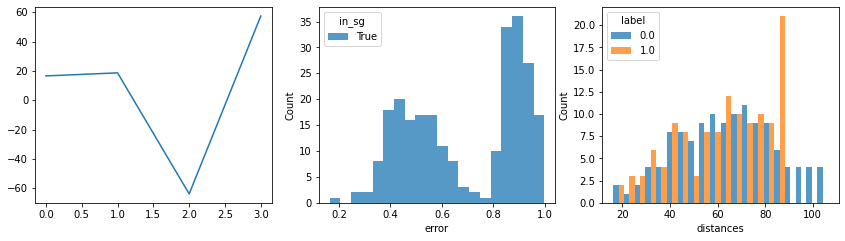

Subgroup 'accuracy': 0.5
confusion matrix, label x subgroup label
[[  0 125]
 [  0 125]]
Error stats
Samples in subgroup:
count    250.000000
mean       0.692030
std        0.218400
min        0.162652
25%        0.484666
50%        0.765448
75%        0.894424
max        0.999123
Name: error, dtype: float64

Samples not in subgroup:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: error, dtype: float64
Testing separation for shapelet 5


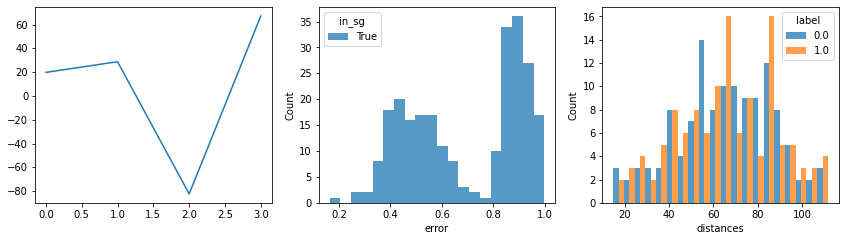

Subgroup 'accuracy': 0.5
confusion matrix, label x subgroup label
[[  0 125]
 [  0 125]]
Error stats
Samples in subgroup:
count    250.000000
mean       0.692030
std        0.218400
min        0.162652
25%        0.484666
50%        0.765448
75%        0.894424
max        0.999123
Name: error, dtype: float64

Samples not in subgroup:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: error, dtype: float64
Testing separation for shapelet 6


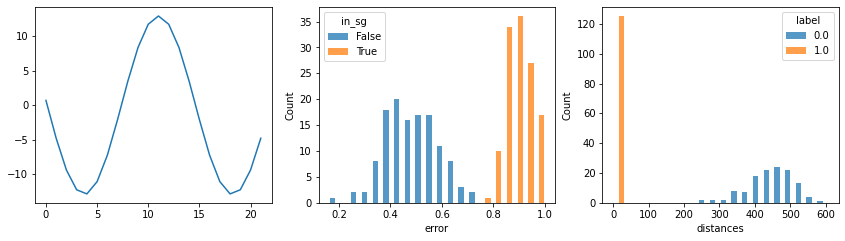

Subgroup 'accuracy': 1.0
confusion matrix, label x subgroup label
[[125   0]
 [  0 125]]
Error stats
Samples in subgroup:
count    125.000000
mean       0.895152
std        0.050003
min        0.788174
25%        0.857315
50%        0.894441
75%        0.931678
max        0.999123
Name: error, dtype: float64

Samples not in subgroup:
count    125.000000
mean       0.488907
std        0.100491
min        0.162652
25%        0.420051
50%        0.484495
75%        0.558477
max        0.742723
Name: error, dtype: float64


In [17]:
for i, shap in enumerate(gendis.best['shapelets'], start=0):
    print(f"Testing separation for shapelet {i}")
    _X_test = copy.deepcopy(X_test)
    _y_test = copy.deepcopy(y_test)
    
    subgroups = gendis.get_subgroups(_X_test, _y_test, shapelets=[shap])
    
    _X_test['distances'] = distances[f'D_{i}']
    _X_test['positions'] = distances[f'L_{i}']
     
    test_subgroup_separation(
        df=df, 
        X=_X_test, 
        y=_y_test, 
        subgroups=subgroups, 
        shap=shap
    )

In [18]:
_X_test = _X_test.sort_values(by='distances')

In [ ]:
plot_k_series_with_shaps(
    _X_test, k=5, 
    shap=gendis.best['shapelets'][0], 
    X_ordered=True
)